In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
oo = sym.Dummy('oo', prime=True)
very_small = 1/oo
x = sym.symbols('x')

C_1, C_2, C_3, C_4 = sym.symbols('C_1, C_2, C_3, C_4')
A_v, B_v, C_v = sym.symbols('A_v, B_v, C_v')
ql, Vl, Ml, kappal, phil, wl = sym.symbols('q_z, V, M, kappa, phi, w')

In [115]:
L = 10
a = 5
F = 35

EI = sym.symbols('EI')


q =  A_v * sym.SingularityFunction(x,0,-1) + F * sym.SingularityFunction(x, 5, -1) + B_v * sym.SingularityFunction(x,10,-1)
display(sym.Eq(ql,q))
print(sym.latex(sym.Eq(ql,q)))

q_{z} = A_{v} {\left\langle x \right\rangle}^{-1} + B_{v} {\left\langle x - 10 \right\rangle}^{-1} + 35 {\left\langle x - 5 \right\rangle}^{-1}


In [113]:
V = -sym.integrate(q, x) + C_1
display(sym.Eq(Vl,V))
print(sym.latex(sym.Eq(Vl,V)))
M = sym.integrate(V, x) + C_2
display(sym.Eq(Ml,M))
print(sym.latex(sym.Eq(Ml,M)))
kappa = M/EI + 1/(2*EI)*sym.SingularityFunction(x,5,0)*(A_v*5) + 1/(2*EI)*sym.SingularityFunction(x,5,1)*(A_v+F)
display(sym.Eq(kappal,kappa))
print(sym.latex(sym.Eq(kappal,kappa)))
phi = sym.integrate(kappa, x) + C_3
display(sym.Eq(phil,phi))
print(sym.latex(sym.Eq(phil,phi)))
w = -sym.integrate(phi, x) + C_4
display(sym.Eq(wl,w))
print(sym.latex(sym.Eq(wl,w)))

V = - A_{v} {\left\langle x \right\rangle}^{0} - B_{v} {\left\langle x - 10 \right\rangle}^{0} + C_{1} - 35 {\left\langle x - 5 \right\rangle}^{0}


M = - A_{v} {\left\langle x \right\rangle}^{1} - B_{v} {\left\langle x - 10 \right\rangle}^{1} + C_{1} x + C_{2} - 35 {\left\langle x - 5 \right\rangle}^{1}


\kappa = \frac{5 A_{v} {\left\langle x - 5 \right\rangle}^{0}}{2 EI} + \frac{\left(A_{v} + 35\right) {\left\langle x - 5 \right\rangle}^{1}}{2 EI} + \frac{- A_{v} {\left\langle x \right\rangle}^{1} - B_{v} {\left\langle x - 10 \right\rangle}^{1} + C_{1} x + C_{2} - 35 {\left\langle x - 5 \right\rangle}^{1}}{EI}


\phi = \frac{5 A_{v} {\left\langle x - 5 \right\rangle}^{1}}{2 EI} + C_{3} + \frac{\left(A_{v} + 35\right) {\left\langle x - 5 \right\rangle}^{2}}{4 EI} + \frac{- \frac{A_{v} {\left\langle x \right\rangle}^{2}}{2} - \frac{B_{v} {\left\langle x - 10 \right\rangle}^{2}}{2} + \frac{C_{1} x^{2}}{2} + C_{2} x - \frac{35 {\left\langle x - 5 \right\rangle}^{2}}{2}}{EI}


w = - \frac{5 A_{v} {\left\langle x - 5 \right\rangle}^{2}}{4 EI} - C_{3} x + C_{4} - \frac{\left(A_{v} + 35\right) {\left\langle x - 5 \right\rangle}^{3}}{12 EI} - \frac{- \frac{A_{v} {\left\langle x \right\rangle}^{3}}{6} - \frac{B_{v} {\left\langle x - 10 \right\rangle}^{3}}{6} + \frac{C_{1} x^{3}}{6} + \frac{C_{2} x^{2}}{2} - \frac{35 {\left\langle x - 5 \right\rangle}^{3}}{6}}{EI}


In [131]:
Eq1 = sym.Eq(w.subs(x,0),0)
Eq2 = sym.Eq(w.subs(x,L),0)
Eq3 = sym.Eq(M.subs(x,0),0)
Eq4 = sym.Eq(M.subs(x,L),0)
Eq5 = sym.Eq(V.subs(x,0-very_small),0).subs(oo,sym.oo)
Eq6 = sym.Eq(V.subs(x,L+very_small),0).subs(oo,sym.oo)

display(Eq1, Eq2, Eq3, Eq4, Eq5, Eq6)
print(sym.latex(Eq1))
print(sym.latex(Eq3))
print(sym.latex(Eq2))
print(sym.latex(Eq4))
print(sym.latex(Eq5))
print(sym.latex(Eq6))

C_{4} = 0
C_{2} = 0
- \frac{125 A_{v}}{4 EI} - 10 C_{3} + C_{4} - \frac{125 \left(A_{v} + 35\right)}{12 EI} - \frac{- \frac{500 A_{v}}{3} + \frac{500 C_{1}}{3} + 50 C_{2} - \frac{4375}{6}}{EI} = 0
- 10 A_{v} + 10 C_{1} + C_{2} - 175 = 0
C_{1} = 0
- A_{v} - B_{v} + C_{1} - 35 = 0


In [133]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6),(C_1,C_2,C_3,C_4,A_v,B_v))
sol_l = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6),(C_1,C_2,C_3,C_4,A_v,B_v),set=True)
print(sym.latex(sol))
display(sym.Eq(wl,w.subs(sol).factor(EI)))

\left\{ A_{v} : - \frac{35}{2}, \  B_{v} : - \frac{35}{2}, \  C_{1} : 0, \  C_{2} : 0, \  C_{3} : - \frac{4375}{24 EI}, \  C_{4} : 0\right\}


In [6]:
w_numpy = sym.lambdify(x, w.subs(sol).subs(EI,10000).rewrite(sym.Piecewise))

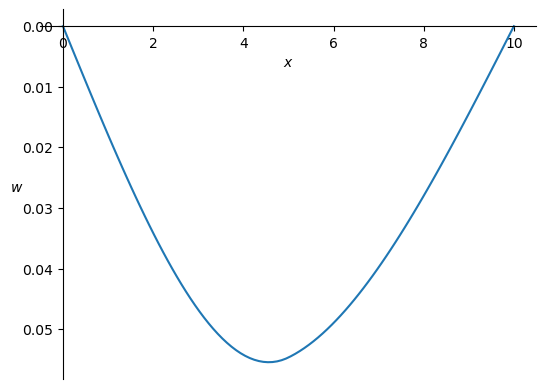

In [7]:
x_numpy = np.linspace(0,10,100)
plt.figure()
plt.plot(x_numpy,w_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$w$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [8]:
V_numpy = sym.lambdify(x, V.subs(sol).rewrite(sym.Piecewise))

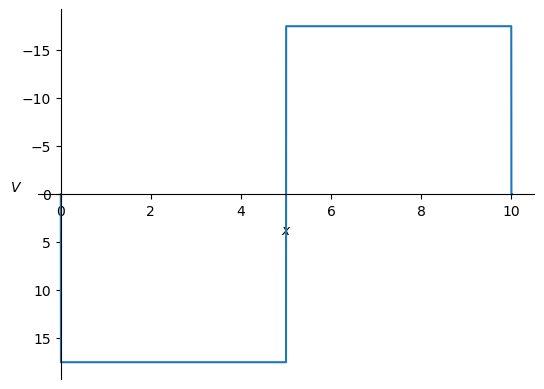

In [9]:
x_numpy = np.linspace(0,10.01,10000)
plt.figure()
plt.plot(x_numpy,V_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$V$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [10]:
M_numpy = sym.lambdify(x, M.subs(sol).rewrite(sym.Piecewise))

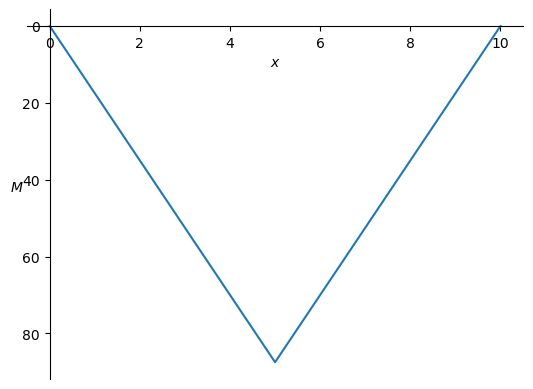

In [11]:
x_numpy = np.linspace(0,10.01,10000)
plt.figure()
plt.plot(x_numpy,M_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$M$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [12]:
kappa_numpy = sym.lambdify(x, kappa.subs(sol).subs(EI,10000).rewrite(sym.Piecewise))

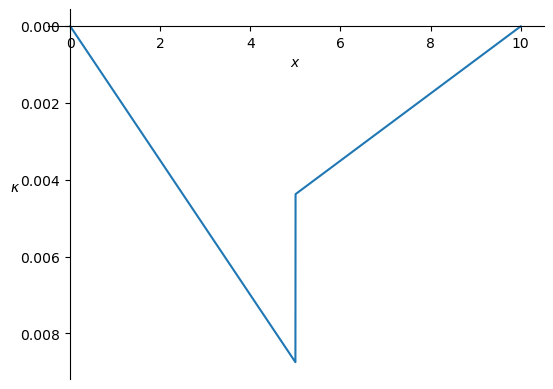

In [13]:
x_numpy = np.linspace(0,10.01,10000)
plt.figure()
plt.plot(x_numpy,kappa_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$\kappa$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()